## Schick Benoit - Dalloshi Lorend - Uluçinar Muhammed Ali

## Exercise 1 - Bayes classification system

### Description des données
- Features :
    - x_n1 = résultat du 1er examen
    - x_n2 = résultat du 2eme examen

- Labels :
    - y = decision d'admission (0 = non admis, 1 = admis)
      
- Classes (labels)
    - C0 = non admis
    - C1 = admis

In [120]:
# Import some useful libraries

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

## 1a. Getting started with Bayes

a) Read the training data from file ex1-data-train.csv. The first two columns are x1 and x2. The last column holds the class label y.

In [121]:
def read_data(file):
    dataset = pd.read_csv(file, names=['x1','x2','y'])
    print(dataset.head())
    return dataset[["x1", "x2"]], dataset["y"].values

In [122]:
X_train, y_train = read_data("ex1-data-train.csv")

          x1         x2  y
0  34.623660  78.024693  0
1  30.286711  43.894998  0
2  35.847409  72.902198  0
3  60.182599  86.308552  1
4  79.032736  75.344376  1


In [123]:
# Prepare a function to compute accuracy
def accuracy_score(y_true, y_pred):
    return (y_true == y_pred).sum() / y_true.size

b) Compute the priors of both classes P(C0) and P(C1)

In [124]:
# TODO: Compute the priors
nb_student = X_train.shape[0]
nb_admis = 0

for i in range(nb_student):
    if y_train[i] == 1:
        nb_admis += 1

P_CO = (nb_student-nb_admis)/nb_student
P_C1 = nb_admis/nb_student

print("PCO : ", P_CO)
print("PC1 : ", P_C1)

PCO :  0.4
PC1 :  0.6


c) Compute histograms of x1 and x2 for each class (total of 4 histograms). Plot these histograms. Advice : use the numpy `histogram(a, bins="auto")` function.

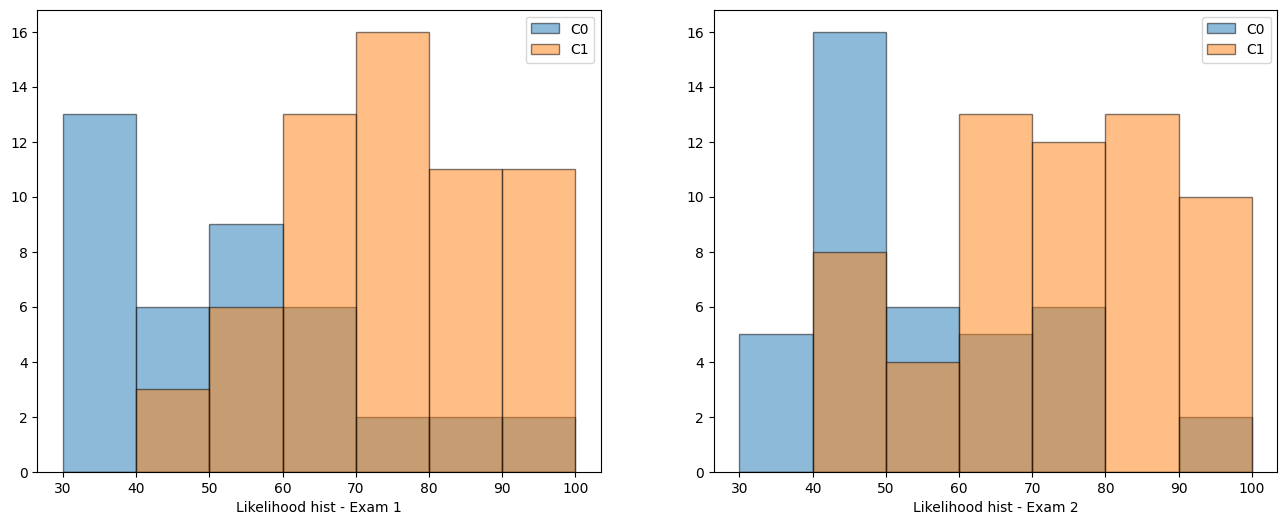

In [125]:
# TODO: Compute histograms

array_x1_C0 = np.zeros(nb_student-nb_admis)
array_x2_C0 = np.zeros(nb_student-nb_admis)
array_x1_C1 = np.zeros(nb_admis)
array_x2_C1 = np.zeros(nb_admis)

indice_non_admis=0
indice_admis=0
for i in range(nb_student):
    
    if y_train[i] == 0:
        array_x1_C0[indice_non_admis] = X_train.iloc[i,0]
        array_x2_C0[indice_non_admis] = X_train.iloc[i,1]
        indice_non_admis += 1
    else:
        array_x1_C1[indice_admis] = X_train.iloc[i,0]
        array_x2_C1[indice_admis] = X_train.iloc[i,1]
        indice_admis += 1

        
# TODO: plot histograms

bins = np.arange(30, 101, 10)

plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
plt.hist(array_x1_C0,bins=bins,label="C0", alpha=0.5, color="tab:blue", edgecolor="black")
plt.hist(array_x1_C1,bins=bins,label="C1", alpha=0.5, color="tab:orange", edgecolor="black")
plt.xlabel('Likelihood hist - Exam 1')
plt.legend()

plt.subplot(1, 2, 2)

plt.hist(array_x2_C0,bins=bins,label="C0", alpha=0.5, color="tab:blue", edgecolor="black")
plt.hist(array_x2_C1,bins=bins,label="C1", alpha=0.5, color="tab:orange", edgecolor="black")
plt.xlabel('Likelihood hist - Exam 2')
plt.legend()

plt.show()

d) Use the histograms to compute the likelihoods p(x1|C0), p(x1|C1), p(x2|C0) and p(x2|C1). For this define a function `likelihood_hist(x, hist_values, edge_values)` that returns the likelihood of x for a given histogram (defined by its values and bin edges as returned by the numpy `histogram()` function).

In [126]:
def likelihood_hist(x: float, hist_values: np.ndarray, bin_edges: np.ndarray) -> float:
    # TODO: compute likelihoods from histograms outputs
    bin_index = 0
    cardinalities = np.sum(hist_values)
    for i in range(len(bin_edges)):
        if x < bin_edges[i]:
            bin_index = i-1
            break;
    
    return hist_values[bin_index]/cardinalities

#hist_values, bin_edges = np.histogram(array_x1_C0, bins=bins)
#print(likelihood_hist(55, hist_values, bin_edges))

e) Implement the classification decision according to Bayes rule and compute the overall accuracy of the system on the test set ex1-data-test.csv. :
- using only feature x1
- using only feature x2
- using x1 and x2 making the naive Bayes hypothesis of feature independence, i.e. p(X|Ck) = p(x1|Ck) · p(x2|Ck)

In [127]:
X_test, y_test = read_data("ex1-data-test.csv")

          x1         x2  y
0  39.196334  78.530294  0
1  40.448499  86.839470  1
2  65.571920  44.303497  0
3  79.648113  70.806564  1
4  66.260221  41.672703  0


In [139]:
# TODO: predict on test set in the 3 cases described above

num_test =  X_test.shape[0]
y_pred = np.zeros(num_test)
bayes_prob_tab = np.zeros((num_test, 2))


hist_values_X1C0, bin_edges = np.histogram(array_x1_C0, bins=bins)
hist_values_X1C1, bin_edges = np.histogram(array_x1_C1, bins=bins)
hist_values_X2C0, bin_edges = np.histogram(array_x2_C0, bins=bins)
hist_values_X2C1, bin_edges = np.histogram(array_x2_C1, bins=bins)


################
## likelihood ##
################

P_X1C0 = np.zeros(num_test)
P_X1C1 = np.zeros(num_test)
P_X2C0 = np.zeros(num_test)
P_X2C1 = np.zeros(num_test)

for i, x_test_value in enumerate(X_test.x1):
    P_X1C0[i] = likelihood_hist(x_test_value, hist_values_X1C0, bin_edges)
    P_X1C1[i] = likelihood_hist(x_test_value, hist_values_X1C1, bin_edges)

for i, x_test_value in enumerate(X_test.x2):
    P_X2C0[i] = likelihood_hist(x_test_value, hist_values_X2C0, bin_edges)
    P_X2C1[i] = likelihood_hist(x_test_value, hist_values_X2C1, bin_edges)

########################
## A posteriori proba ##
########################

# only feature x1
for i in range(num_test):
    PC0_x1 = P_X1C0[i] * P_CO
    PC1_x1 = P_X1C1[i] * P_C1
    bayes_prob_tab[i] = [PC0_x1, PC1_x1]
    y_pred[i] = np.argmax(bayes_prob_tab[i])

print(accuracy_score(y_test, y_pred))

# only feature x2
for i in range(num_test):
    PC0_x2 = P_X2C0[i] * P_CO
    PC1_x2 = P_X2C1[i] * P_C1
    bayes_prob_tab[i] = [PC0_x2, PC1_x2]
    y_pred[i] = np.argmax(bayes_prob_tab[i])
    
print(accuracy_score(y_test, y_pred))

# feature x1, x2
for i in range(num_test):
    PC0_x1x2 = P_X1C0[i] * P_X2C0[i] * P_CO
    PC1_x1x2 = P_X1C1[i] * P_X2C1[i] * P_C1
    bayes_prob_tab[i] = [PC0_x1x2, PC1_x1x2]
    y_pred[i] = np.argmax(bayes_prob_tab[i])

print(accuracy_score(y_test, y_pred))

0.62
0.73
0.83


Which system is the best ?

TODO:
Le meilleur système est celui avec 2 features (accuracy de 83%) parce-que lorsqu'on introduit 2 features, les classes C0 et C1 sont bien délimitées (cf. figure 1 dans la donnée)

## 1b. Bayes - Univariate Gaussian distribution

Do the same as in a) but this time using univariate Gaussian distribution to model the likelihoods p(x1|C0), p(x1|C1), p(x2|C0) and p(x2|C1). You may use the numpy functions `mean()` and `var()` to compute the mean μ and variance σ2 of the distribution. To model the likelihood of both features, you may also do the naive Bayes hypothesis of feature independence, i.e. p(X|Ck) = p(x1|Ck) · p(x2|Ck).


In [130]:
def likelihood_univariate_gaussian(x: float, mean: float, var: float) -> float:
    # TODO: compute likelihoods from histograms outputs
    return (1/(np.sqrt(2*np.pi*var))) * np.exp(-1/(2*var)*(x-mean)**2)

In [142]:
# TODO: Compute mean and variance for each classes and each features (8 values)
mu_X1C0 = np.mean(array_x1_C0)
mu_X1C1 = np.mean(array_x1_C1)
mu_X2C0 = np.mean(array_x2_C0)
mu_X2C1 = np.mean(array_x2_C1)

var_X1C0 = np.var(array_x1_C0)
var_X1C1 = np.var(array_x1_C1)
var_X2C0 = np.var(array_x2_C0)
var_X2C1 = np.var(array_x2_C1)

In [144]:
# TODO: predict on test set in the 3 cases

################
## likelihood ##
################

P_X1C0 = np.zeros(num_test)
P_X1C1 = np.zeros(num_test)
P_X2C0 = np.zeros(num_test)
P_X2C1 = np.zeros(num_test)

for i, x_test_value in enumerate(X_test.x1):
    P_X1C0[i] = likelihood_univariate_gaussian(x_test_value, mu_X1C0, var_X1C0)
    P_X1C1[i] = likelihood_univariate_gaussian(x_test_value, mu_X1C1, var_X1C1)

for i, x_test_value in enumerate(X_test.x2):
    P_X2C0[i] = likelihood_univariate_gaussian(x_test_value, mu_X2C0, var_X2C0)
    P_X2C1[i] = likelihood_univariate_gaussian(x_test_value, mu_X2C1, var_X2C1)

########################
## A posteriori proba ##
########################

# only feature x1
for i in range(num_test):
    PC0_x1 = P_X1C0[i] * P_CO
    PC1_x1 = P_X1C1[i] * P_C1
    bayes_prob_tab[i] = [PC0_x1, PC1_x1]
    y_pred[i] = np.argmax(bayes_prob_tab[i])

print(accuracy_score(y_test, y_pred))

# only feature x2
for i in range(num_test):
    PC0_x2 = P_X2C0[i] * P_CO
    PC1_x2 = P_X2C1[i] * P_C1
    bayes_prob_tab[i] = [PC0_x2, PC1_x2]
    y_pred[i] = np.argmax(bayes_prob_tab[i])
    
print(accuracy_score(y_test, y_pred))

# feature x1, x2
for i in range(num_test):
    PC0_x1x2 = P_X1C0[i] * P_X2C0[i] * P_CO
    PC1_x1x2 = P_X1C1[i] * P_X2C1[i] * P_C1
    bayes_prob_tab[i] = [PC0_x1x2, PC1_x1x2]
    y_pred[i] = np.argmax(bayes_prob_tab[i])

print(accuracy_score(y_test, y_pred))

0.71
0.72
0.89
